<a href="https://colab.research.google.com/github/janairacs/janairacs-challenge1-data-science/blob/main/AluraStoreBr_Janaira_Casotti_de_Souza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

#Urls dos dados
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

#carregando os dados
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [7]:
import pandas as pd

# URLs dos dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregando os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionando uma coluna para identificar a loja
loja1['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

# Concatenando os DataFrames em um único
dados = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Calculando o faturamento total por loja (soma da coluna 'Preço')
faturamento_por_loja = dados.groupby('loja')['Preço'].sum().sort_values(ascending=False)

# Função para formatar valor em real brasileiro
def formatar_real(valor):
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

print("Faturamento total por loja:")
for loja, valor in faturamento_por_loja.items():
    print(f"{loja}: {formatar_real(valor)}")


Faturamento total por loja:
Loja 1: R$ 1.534.509,12
Loja 2: R$ 1.488.459,06
Loja 3: R$ 1.464.025,03
Loja 4: R$ 1.384.497,58


**Análise de Faturamento das Lojas**

A loja menos rentável é a Loja 4, com faturamento total de R$ 1.384.497,58, o menor valor entre as quatro lojas analisadas.

# 2. Vendas por Categoria


In [8]:
# Renomeando a coluna Categoria do Produto para facilitar
dados.rename(columns={'Categoria do Produto': 'categoria'}, inplace=True)

# Agrupar por loja e categoria e contar o número de vendas (linhas)
quantidade_por_categoria = dados.groupby(['loja', 'categoria']).size().reset_index(name='quantidade_vendida')

# Mostrar as categorias mais vendidas por loja (ordenando)
for loja in quantidade_por_categoria['loja'].unique():
    print(f"\nCategorias mais vendidas na {loja}:")
    df_loja = quantidade_por_categoria[quantidade_por_categoria['loja'] == loja]
    df_loja = df_loja.sort_values(by='quantidade_vendida', ascending=False)
    print(df_loja[['categoria', 'quantidade_vendida']])



Categorias mais vendidas na Loja 1:
               categoria  quantidade_vendida
6                 moveis                 465
2            eletronicos                 448
0             brinquedos                 324
1       eletrodomesticos                 312
3        esporte e lazer                 284
4  instrumentos musicais                 182
5                 livros                 173
7  utilidades domesticas                 171

Categorias mais vendidas na Loja 2:
                categoria  quantidade_vendida
14                 moveis                 442
10            eletronicos                 422
8              brinquedos                 313
9        eletrodomesticos                 305
11        esporte e lazer                 275
12  instrumentos musicais                 224
13                 livros                 197
15  utilidades domesticas                 181

Categorias mais vendidas na Loja 3:
                categoria  quantidade_vendida
22                 movei

# 3. Média de Avaliação das Lojas

In [9]:
# Renomear a coluna para facilitar o uso
dados.rename(columns={'Avaliação da compra': 'avaliacao'}, inplace=True)

# Calcular a média das avaliações por loja
media_avaliacoes = dados.groupby('loja')['avaliacao'].mean().sort_values(ascending=False)

print("Média das avaliações dos clientes por loja:")
for loja, media in media_avaliacoes.items():
    print(f"{loja}: {media:.2f}")


Média das avaliações dos clientes por loja:
Loja 3: 4.05
Loja 2: 4.04
Loja 4: 4.00
Loja 1: 3.98


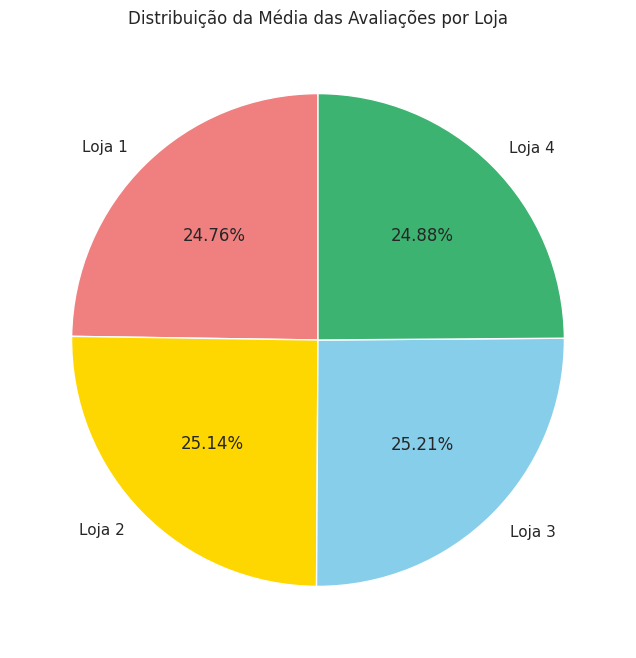

In [16]:
import matplotlib.pyplot as plt

# Recalcula média para garantir consistência
media_avaliacoes = dados.groupby('loja')['avaliacao'].mean()

# Cores personalizadas (opcional)
cores = ['lightcoral', 'gold', 'skyblue', 'mediumseagreen']

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(media_avaliacoes,
        labels=media_avaliacoes.index,
        autopct='%.2f%%',
        colors=cores,
        startangle=90,
        wedgeprops={'edgecolor': 'white'})

# Título
plt.title('Distribuição da Média das Avaliações por Loja')

# Exibir
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [12]:
# Contar os produtos vendidos por loja
produtos_por_loja = dados.groupby(['loja', 'Produto']).size().reset_index(name='Quantidade')

# Produtos mais vendidos por loja
mais_vendidos = produtos_por_loja.sort_values(['loja', 'Quantidade'], ascending=[True, False]).groupby('loja').head(1)

# Produtos menos vendidos por loja
menos_vendidos = produtos_por_loja.sort_values(['loja', 'Quantidade'], ascending=[True, True]).groupby('loja').head(1)

print("Produtos mais vendidos por loja:")
print(mais_vendidos)

print("\nProdutos menos vendidos por loja:")
print(menos_vendidos)


Produtos mais vendidos por loja:
       loja                   Produto  Quantidade
24   Loja 1             Guarda roupas          60
79   Loja 2  Iniciando em programação          65
134  Loja 3             Kit banquetas          57
161  Loja 4                  Cama box          62

Produtos menos vendidos por loja:
       loja            Produto  Quantidade
11   Loja 1       Celular ABXY          33
82   Loja 2  Jogo de tabuleiro          32
105  Loja 3   Blocos de montar          35
178  Loja 4           Guitarra          33


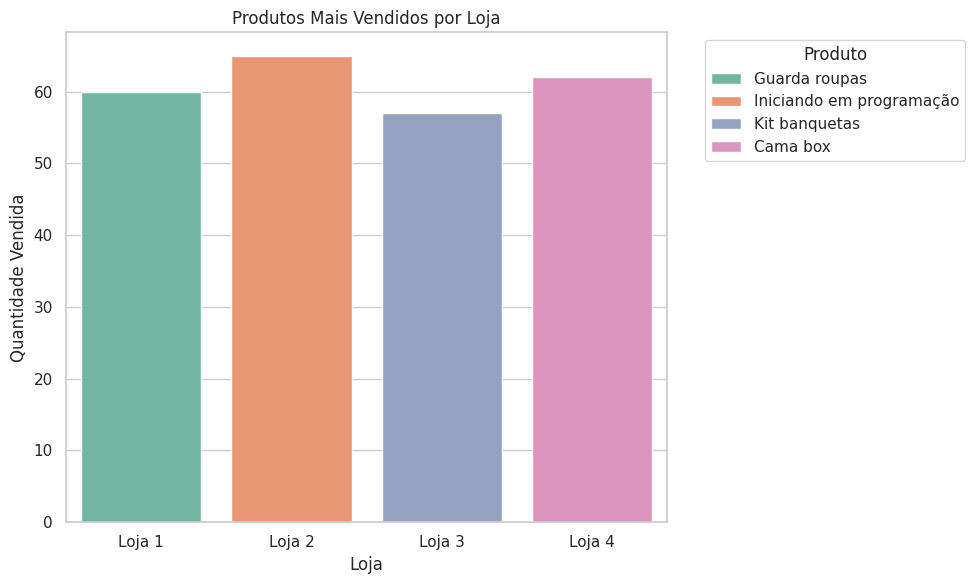

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Gráfico de barras para os produtos mais vendidos
plt.figure(figsize=(10,6))
sns.barplot(data=mais_vendidos, x='loja', y='Quantidade', hue='Produto', dodge=False, palette='Set2')

plt.title('Produtos Mais Vendidos por Loja')
plt.xlabel('Loja')
plt.ylabel('Quantidade Vendida')
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [14]:
# Calcular o valor médio do frete por loja
frete_medio_por_loja = dados.groupby('loja')['Frete'].mean().sort_values()

# Exibir os resultados
print("Frete médio por loja:")
for loja, frete in frete_medio_por_loja.items():
    print(f"{loja}: R$ {frete:.2f}")


Frete médio por loja:
Loja 4: R$ 31.28
Loja 3: R$ 33.07
Loja 2: R$ 33.62
Loja 1: R$ 34.69


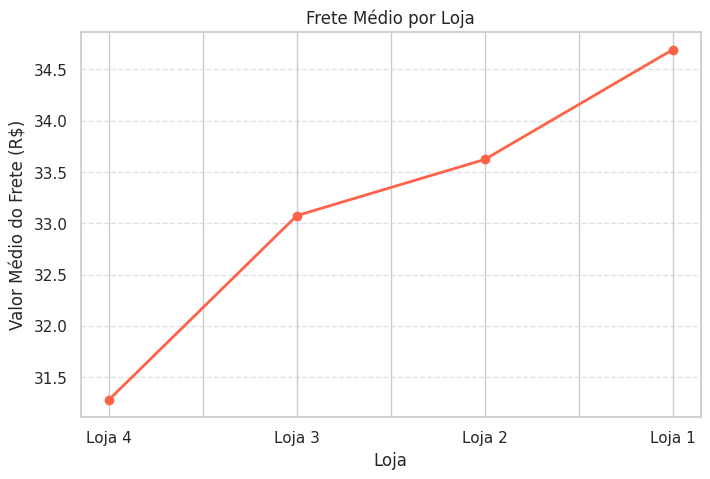

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de linhas
plt.figure(figsize=(8,5))
frete_medio_por_loja.plot(kind='line', marker='o', color='tomato', linewidth=2)

# Personalização
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Exibir
plt.show()

